<a href="https://colab.research.google.com/github/Riccardolotorto/GeoPandasPython/blob/main/GeoPandasES1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. caricare i quartieri in un geodataframe

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!pip install geopandas

In [ ]:
import pandas as pd
import geopandas as gdp 
import matplotlib.pyplot as plt

In [ ]:
quartieri = gdp.read_file("/content/drive/MyDrive/Colab Notebooks/LOTORTO RICCARDO - ds964_nil_wm.zip")

2. visualizzare l'intestazione

In [ ]:
quartieri.head()

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
0,48,RONCHETTO SUL NAVIGLIO - Q.RE LODOVICO IL MORO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,8723.368714,2.406306e+06,89,"POLYGON ((9.15422 45.43775, 9.15419 45.43707, ..."
1,64,TRENNO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3309.998800,4.896921e+05,90,"POLYGON ((9.10623 45.49016, 9.10295 45.48939, ..."
2,67,PORTELLO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,3800.750663,9.096022e+05,91,"POLYGON ((9.15636 45.48785, 9.15724 45.48721, ..."
3,81,BOVISASCA,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7105.469715,1.578028e+06,92,"POLYGON ((9.16803 45.52234, 9.16687 45.52027, ..."
4,84,PARCO NORD,05/02/2020,Vigente,Milano 2030 - PGT Approvato,11741.717005,1.532331e+06,93,"POLYGON ((9.20040 45.52848, 9.20055 45.52828, ..."


3. visualizzare i nomi di tutti i quartieri presenti in ordine alfabetico

In [ ]:
quartieri.sort_values(by="NIL")[["NIL"]]

,NIL
86,ADRIANO
69,AFFORI
36,ASSIANO
65,BAGGIO - Q.RE DEGLI OLMI - Q.RE VALSESIA
57,BANDE NERE
...,...
31,TRIULZO SUPERIORE
44,UMBRIA - MOLISE - CALVAIRATE
38,VIGENTINO - Q.RE FATIMA
27,VILLAPIZZONE - CAGNOLA - BOLDINASCO


4. visualizzare tutti i quartieri su una mappa di Milano

In [ ]:
!pip install contextily

In [ ]:
import contextily

In [ ]:
quartieri.crs

In [ ]:
quartieri_mercator = quartieri.to_crs(epsg = 3857)

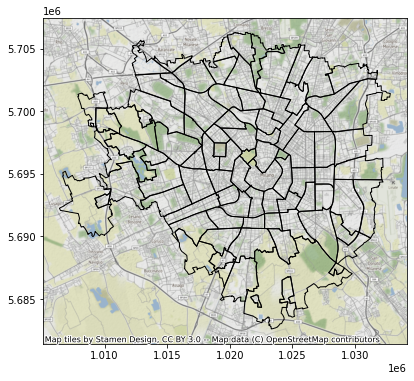

In [ ]:
ax = quartieri_mercator.plot(figsize = (12, 6), edgecolor = "k", facecolor = "none")
contextily.add_basemap(ax)

5.  cercare il quartiere che contiene il Duomo di Milano

In [ ]:
from shapely.geometry import Point

In [ ]:
duomo_monumento1 = Point(9.191926, 45.464098)

In [ ]:
type(duomo_monumento1)

shapely.geometry.point.Point

In [ ]:
duomo_quartiere = quartieri[quartieri.contains(duomo_monumento1)]
duomo_quartiere

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
12,1,DUOMO,05/02/2020,Vigente,Milano 2030 - PGT Approvato,7571.275544,2.341616e+06,101,"POLYGON ((9.19482 45.47201, 9.19495 45.47213, ..."


6. visualizzare sulla mappa il Duomo di Milano e il quartiere che lo contiene

In [ ]:
duomo_giusto = duomo_quartiere.to_crs(epsg=3857)

In [ ]:
duomo_monumento = gdp.GeoSeries([Point(9.191926, 45.464098)], crs=4326) #creare un punto in forma di GeoSeries
duomo_monumeto3857 = duomo_monumento.to_crs(3857)

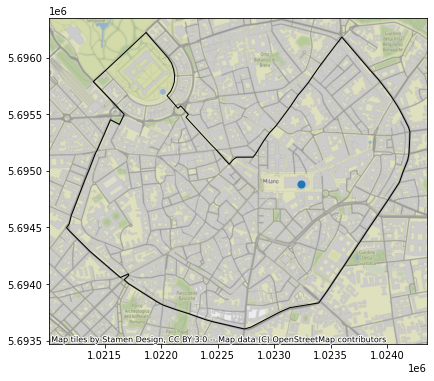

In [ ]:
ax = duomo_giusto.plot(figsize = (12, 6), edgecolor = "k", facecolor = "none")
duomo_monumeto3857.plot(ax=ax, markersize = 50)
contextily.add_basemap(ax)

7. visualizzare i quartieri che confinano con quello del duomo

In [ ]:
duomo_oggetto = quartieri.loc[quartieri["NIL"] == "DUOMO", "geometry"].item()

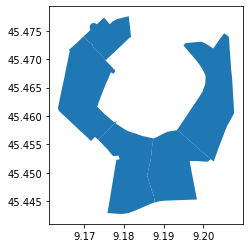

In [ ]:
attorno = quartieri[quartieri.touches(duomo_oggetto)]
attorno.plot()

8. visualizzare il quartiere del galvani

In [ ]:
galvani = Point(9.1885776, 45.5065988)
quartieri[quartieri.contains(galvani)]

,ID_NIL,NIL,Valido_dal,Valido_al,Fonte,Shape_Leng,Shape_Area,OBJECTID,geometry
30,14,NIGUARDA - CA' GRANDA - PRATO CENTENARO - Q.RE...,05/02/2020,Vigente,Milano 2030 - PGT Approvato,10628.640923,4.246805e+06,119,"POLYGON ((9.21337 45.52948, 9.21337 45.52948, ..."
